In [2]:
import numpy as np
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline  
cwd = os.getcwd()
print ("Current folder is %s" % (cwd) )

Current folder is /home/koosy/Lectures/UBO_16SS/LabVision/5.ass5


In [3]:
# Training set folder 
paths = {"images/cats", "images/dogs"}
# The reshape size
imgsize = [112, 112]
# Save name
data_name = "data4vgg"

In [4]:
# check the total number of training data
valid_exts = [".jpg",".gif",".png",".tga", ".jpeg"]
imgcnt = 0
nclass = len(paths)
for relpath in paths:
    fullpath = cwd + "/" + relpath
    flist = os.listdir(fullpath)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(fullpath, f)
        imgcnt = imgcnt + 1

print ("Number of total images is %d" % (imgcnt))

Number of total images is 87


In [5]:
# Let's save them!
totalimg   = np.ndarray((imgcnt, imgsize[0]*imgsize[1]*3))
totallabel = np.ndarray((imgcnt, nclass))
imgcnt     = 0
for i, relpath in zip(range(nclass), paths):
    path = cwd + "/" + relpath
    flist = os.listdir(path)
    for f in flist:
        if os.path.splitext(f)[1].lower() not in valid_exts:
            continue
        fullpath = os.path.join(path, f)
        currimg  = imread(fullpath)
        # Reshape
        small = imresize(currimg, [imgsize[0], imgsize[1]])/255.
        vec   = np.reshape(small, (1, -1))
        # Save 
        totalimg[imgcnt, :] = vec
        totallabel[imgcnt, :] = np.eye(nclass, nclass)[i]
        imgcnt    = imgcnt + 1
        
# Divide total data into training and test set
randidx  = np.random.randint(imgcnt, size=imgcnt)
trainidx = randidx[0:int(4*imgcnt/5)]
testidx  = randidx[int(4*imgcnt/5):imgcnt]

trainimg   = totalimg[trainidx, :]
trainlabel = totallabel[trainidx, :]
testimg    = totalimg[testidx, :]
testlabel  = totallabel[testidx, :]

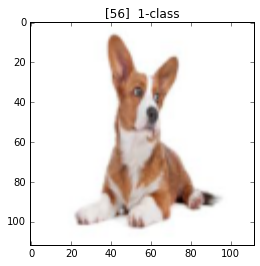

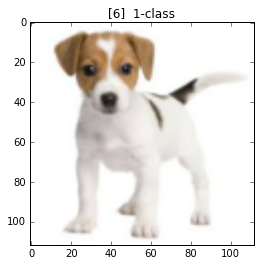

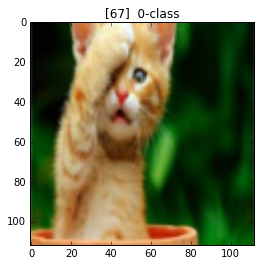

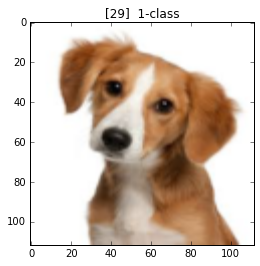

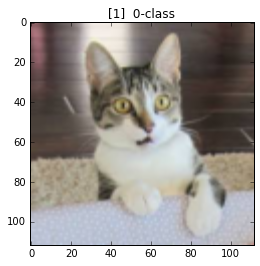

In [6]:
# Plot
ntrain = trainimg.shape[0]
batch_size = 5;
randidx = np.random.randint(ntrain, size=batch_size)
for i in randidx: 
    currlabel_onehot = trainlabel[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
    plt.imshow(currimg)
    plt.title("[" + str(i) + "]  " + str(currlabel) + "-class") 
    plt.show() 

In [7]:
# Save them! 
savepath = cwd + "/data/" + data_name + ".npz"
np.savez(savepath, trainimg=trainimg, trainlabel=trainlabel
         , testimg=testimg, testlabel=testlabel)
print ("Saved to %s" % (savepath))

Saved to /home/koosy/Lectures/UBO_16SS/LabVision/5.ass5/data/data4vgg.npz


In [8]:
# Load them!
cwd = os.getcwd()
loadpath = cwd + "/data/" + data_name + ".npz"
l = np.load(loadpath)

# See what's in here
print l.files

# Parse data
trainimg_loaded = l['trainimg']
trainlabel_loaded = l['trainlabel']
testimg_loaded = l['testimg']
testlabel_loaded = l['testlabel']

print ("%d train images loaded" % (trainimg_loaded.shape[0]))
print ("%d test images loaded" % (testimg_loaded.shape[0]))

print ("Loaded from to %s" % (savepath))

['trainlabel', 'trainimg', 'testimg', 'testlabel']
69 train images loaded
18 test images loaded
Loaded from to /home/koosy/Lectures/UBO_16SS/LabVision/5.ass5/data/data4vgg.npz


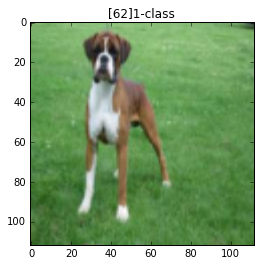

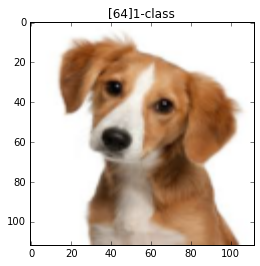

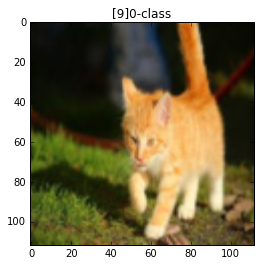

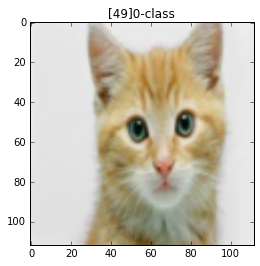

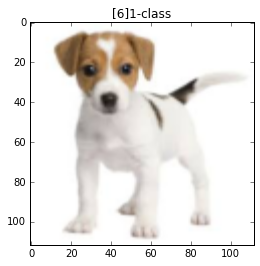

In [9]:
# Do batch stuff using loaded data 
ntrain_loaded = trainimg_loaded.shape[0]
batch_size = 5;
randidx = np.random.randint(ntrain_loaded, size=batch_size)
for i in randidx: 
    currimg = np.reshape(trainimg_loaded[i, :], (imgsize[0], -1))
    currlabel_onehot = trainlabel_loaded[i, :]
    currlabel = np.argmax(currlabel_onehot) 
    currimg = np.reshape(trainimg[i, :], (imgsize[0], imgsize[1], 3))
    plt.imshow(currimg)
    plt.title("[" + str(i) + "]" + str(currlabel) + "-class") 
    plt.show() 